In [75]:
using Intervalos

#[1]
#### ¿Cuál sería una definición matemática razonable de un intervalo multi-dimensional?

Podríamos hacer un arreglo de intervalos, de modo que si tenemos `N` dimensiones entonces trabajemos con un vector de `N` entradas donde cada entrada es un objeto tipo `Intervalo`

#[2]
#### ¿Cómo podríamos expresar esto en Julia? Da dos posibilidades.

##### [Pista: Checa typealias]


MÉTODO #1

Una opción es definir un nuevo tipo que sea un arreglo de intervalos

In [76]:
type IntervalDim{N}
    a::Vector{Intervalo} #Array{Intervalo,1}
    IntervalDim(a) = ( length(a)==int(N) ? new(a) : error("Error de dimensión"))
end


Base.show(io::IO, a::IntervalDim) = print(io::IO, "IntervalDim{$(length(a.a))}
$(a.a)");

In [77]:
IntervalDim{3}([Intervalo(1,2),Intervalo(1,1)])

LoadError: Error de dimensión
while loading In[77], in expression starting on line 1

In [78]:
IntervalDim{2}([Intervalo(1,2),Intervalo(1,1)])

IntervalDim{2}
[[1e+00,
2e+00],[1e+00,
1e+00]]

Como vamos a trabajar normalmente con $\mathbb{R}^2$ voy a definir uno por 'default' de dimensión dos.

In [79]:
IntervalDim(a::Array{Intervalo,1})=IntervalDim{2}(a::Array{Intervalo,1})

IntervalDim{N} (constructor with 1 method)

In [80]:
vect1=IntervalDim([Intervalo(1,2),Intervalo(1,1)])

IntervalDim{2}
[[1e+00,
2e+00],[1e+00,
1e+00]]

# 
MÉTODO #2

Otra opción es utilizar el hint (typealias):

In [81]:
typealias IntervalD{} Vector{Intervalo}

Array{Intervalo,1}

In [82]:
typeof([Intervalo(0,1),Intervalo(2,3)])==IntervalD{}

true

De modo que tenemos que definir los arreglos de intervalos de la manera usual pero podemos hacer referencia a su tipo utilizando `IntervalD`.

Por ejemplo:

In [83]:
function algo(c::IntervalD,b::Intervalo)
    c[1]=b
    c
end

algo([Intervalo(0,1),Intervalo(2,3)]  ,  Intervalo(5,5))

2-element Array{Intervalo,1}:
 [5e+00,
5e+00]
 [2e+00,
3e+00]

También puedo definir una función que me genere elementos de tamaño `n` de ese tipo:

In [84]:
intervalD(n::Int64) = Array(Intervalo,n)
intervalD()=intervalD(2)

asdf=intervalD() #este es un arreglo 'vacío' de dos elementos
if typeof(asdf)==IntervalD
    println(asdf)
end

[#undef,#undef]


#[3]
#### ¿Cuáles operaciones matemáticas necesitaremos definir sobre los intervalos multi-dimensionales? Impleméntalos en un módulo. ¿Cuál de las dos definiciones resulta más útil en ese respecto?

MÉTODO #1

Pues si utilizamos el primero tenemos que definir TODAS las operaciones, aunque la definición es fácil ya que solo debemos hacer:

In [85]:
function definidorDim!(f::Function)
    f(x::IntervalDim,y::IntervalDim)=f(x.a,y.a)
end

definidorDim! (generic function with 1 method)

In [86]:
definidorDim!(+)
definidorDim!(-)
definidorDim!(.*)
definidorDim!(./)
definidorDim!(⋅)

dot (generic function with 8 methods)

In [109]:
vect1=IntervalDim([Intervalo(1,2),Intervalo(1,1)])
vect2=IntervalDim([Intervalo(0,1),Intervalo(2,3)])

#println(vect1+vect2)
#println(vect2-vect1)
println(vect1.*vect2)
#println(vect2./vect1)
#println(vect1⋅vect2)

[[0e+00,
2e+00],[2e+00,
3e+00]]


# 
MÉTODO #2

No tenemos que definir operaciones ya que ya estan definidas las operaciones entre vectores

In [88]:
vect1=[Intervalo(1,2),Intervalo(1,1)]
vect2=[Intervalo(0,1),Intervalo(2,3)]

#println(vect1+vect2)
#println(vect2-vect1)
#println(vect1.*vect2)
#println(vect2./vect1)
println(vect1⋅vect2)

[2e+00,
5e+00]


#[4]
#### Considera la función $f:\mathbb{R}^2→\mathbb{R}^2$, dada por $f(x,y)=\mathsf{M}⋅\mathbf{x}$, con $\mathsf{M} =\begin{pmatrix}
2 & 1 \\
1 & 1
\end{pmatrix}.$

#### (i) Encuentra a mano la imagen del cuadrado unitario. Encuentra el intervalo multi-dimensional más pequeño que contiene este conjunto.

In [89]:
using PyPlot

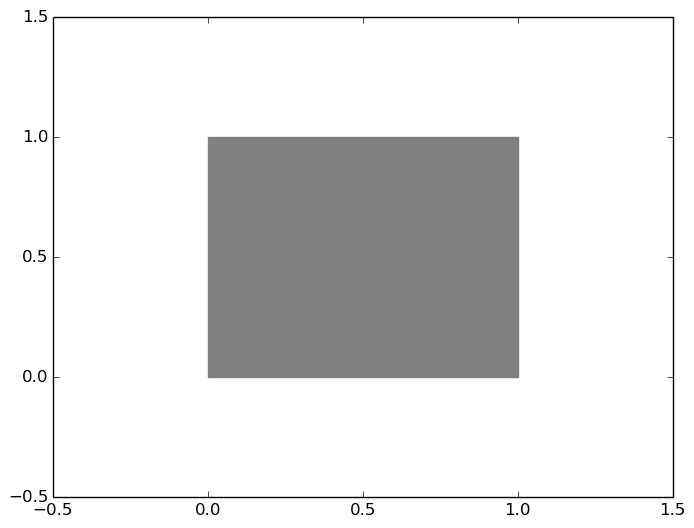

In [90]:
#El cuadrado unitario está dado por:
PyPlot.fill_between([0,1],0,1,color="gray")
PyPlot.xlim(-0.5,1.5)
PyPlot.ylim(-0.5,1.5);

Veamos a donde manda algunos puntos:

In [137]:
mat=[[2,1] [1,1]]

2x2 Array{Int64,2}:
 2  1
 1  1

In [92]:
x=([0,0],[0,1/4],[0,1/2],[0,3/4],[0,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,0] y [0,1] se va a una recta que une [0,0] y [1,1]")
println()
x=([0,0],[1/4,0],[1/2,0],[3/4,0],[1,0])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,0] y [1,0] se va a una recta que une [0,0] y [2,1]")
println()
x=([0,1],[1/4,1],[1/2,1],[3/4,1],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,1] y [1,1] se va a una recta que une [1,1] y [3,2]")
println()
x=([1,0],[1,1/4],[1,1/2],[1,3/4],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [1,0] y [1,1] se va a una recta que une [2,1] y [3,2]")

[0,0] → [0,0]
[0.0,0.25] → [0.25,0.25]
[0.0,0.5] → [0.5,0.5]
[0.0,0.75] → [0.75,0.75]
[0,1] → [1,1]
La recta que une [0,0] y [0,1] se va a una recta que une [0,0] y [1,1]

[0,0] → [0,0]
[0.25,0.0] → [0.5,0.25]
[0.5,0.0] → [1.0,0.5]
[0.75,0.0] → [1.5,0.75]
[1,0] → [2,1]
La recta que une [0,0] y [1,0] se va a una recta que une [0,0] y [2,1]

[0,1] → [1,1]
[0.25,1.0] → [1.5,1.25]
[0.5,1.0] → [2.0,1.5]
[0.75,1.0] → [2.5,1.75]
[1,1] → [3,2]
La recta que une [0,1] y [1,1] se va a una recta que une [1,1] y [3,2]

[1,0] → [2,1]
[1.0,0.25] → [2.25,1.25]
[1.0,0.5] → [2.5,1.5]
[1.0,0.75] → [2.75,1.75]
[1,1] → [3,2]
La recta que une [1,0] y [1,1] se va a una recta que une [2,1] y [3,2]


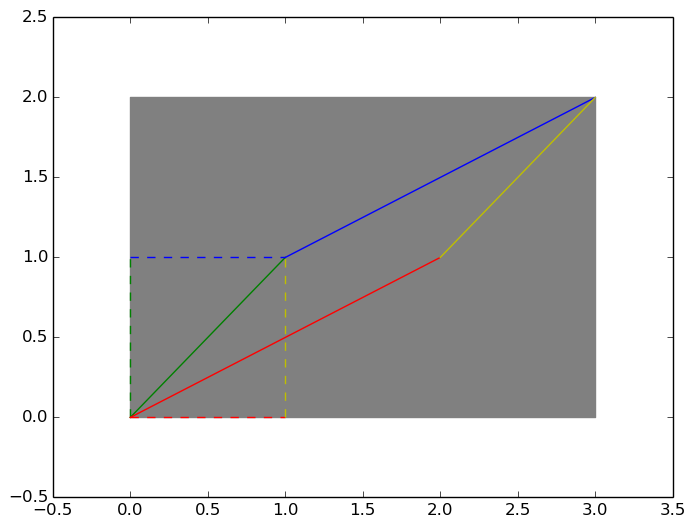

In [93]:
PyPlot.xlim(-0.5,3.5)
PyPlot.ylim(-0.5,2.5);

PyPlot.plot([0,0],[0,1],"--g")
PyPlot.plot([0,1],[0,1],"-g")

PyPlot.plot([0,1],[0,0],"--r")
PyPlot.plot([0,2],[0,1],"-r")

PyPlot.plot([0,1],[1,1],"--b")
PyPlot.plot([1,3],[1,2],"-b")

PyPlot.plot([1,1],[0,1],"--y")
PyPlot.plot([2,3],[1,2],"-y")

PyPlot.fill_between([0,3],0,2,color="gray");

El intervalo multidimensional más pequeño que contiene la imagen es:

In [94]:
[Intervalo(0,3),Intervalo(0,2)]

2-element Array{Intervalo,1}:
 [0e+00,
3e+00]
 [0e+00,
2e+00]

#### (ii) Verifica el resultado con tu código.

In [96]:
inter2d=[Intervalo(0,1),Intervalo(0,1)]

2-element Array{Intervalo,1}:
 [0e+00,
1e+00]
 [0e+00,
1e+00]

In [98]:
mat*inter2d

LoadError: `zero` has no method matching zero(::Type{Any})
while loading In[98], in expression starting on line 1

In [119]:
2*inter2d[1]+1*inter2d[2]
[2,1]⋅inter2d

[0e+00,
3e+00]

In [120]:
1*inter2d[1]+1*inter2d[2]
[1,1]⋅inter2d

[0e+00,
2e+00]

In [ ]:
*(m::Array{Any,2},x::Array{Intervalo,1})=

In [123]:
typeof(inter2d)

Array{Intervalo,1}

In [128]:
mat[1:2]⋅inter2d

[0e+00,
3e+00]

In [133]:
mat[1:2,1]

2-element Array{Int64,1}:
 2
 1

In [135]:
mat[1:2,2]

2-element Array{Int64,1}:
 1
 1

In [141]:
mat2=[[2,1] [0,1]]

2x2 Array{Int64,2}:
 2  0
 1  1

In [147]:
mat2*[1,1]

2-element Array{Int64,1}:
 2
 2

In [155]:
(transpose(mat))[1:2,1]⋅[1,1]
#mat[1:2,1]⋅[1,1]

3

In [146]:
transpose(mat2[1,1:2])

2x1 Array{Int64,2}:
 2
 0